In [1]:
import pandas as pd
import datamol as dm
from datamol import sanitize_mol, remove_salts_solvents

In [2]:
df = dm.read_csv('data/gdb_1000.smi', header=None, smiles_column=0).rename(columns={0: 'smi'})

In [3]:
from rdkit.Chem import Descriptors
Descriptors.descList

[('MaxAbsEStateIndex',
  <function rdkit.Chem.EState.EState.MaxAbsEStateIndex(mol, force=1)>),
 ('MaxEStateIndex',
  <function rdkit.Chem.EState.EState.MaxEStateIndex(mol, force=1)>),
 ('MinAbsEStateIndex',
  <function rdkit.Chem.EState.EState.MinAbsEStateIndex(mol, force=1)>),
 ('MinEStateIndex',
  <function rdkit.Chem.EState.EState.MinEStateIndex(mol, force=1)>),
 ('qed',
  <function rdkit.Chem.QED.qed(mol, w=QEDproperties(MW=0.66, ALOGP=0.46, HBA=0.05, HBD=0.61, PSA=0.06, ROTB=0.65, AROM=0.48, ALERTS=0.95), qedProperties=None)>),
 ('SPS', <function rdkit.Chem.SpacialScore.SPS(mol, normalize=True)>),
 ('MolWt', <function rdkit.Chem.Descriptors.<lambda>(*x, **y)>),
 ('HeavyAtomMolWt', <function rdkit.Chem.Descriptors.HeavyAtomMolWt(x)>),
 ('ExactMolWt', <function rdkit.Chem.Descriptors.<lambda>(*x, **y)>),
 ('NumValenceElectrons',
  <function rdkit.Chem.Descriptors.NumValenceElectrons(mol)>),
 ('NumRadicalElectrons',
  <function rdkit.Chem.Descriptors.NumRadicalElectrons(mol)>),
 ('Ma

In [4]:
from molfeat.trans import FPVecTransformer

descriptors = ['MolWt', 'MolLogP', 'NumHAcceptors', 'NumHDonors', 'NumAromaticRings', 'NumHeteroatoms', 'NumRotatableBonds', 'FractionCSP3']

trans = FPVecTransformer('desc2D', descrs=descriptors, n_jobs=-1, do_not_standardize=True)

with dm.without_rdkit_log():
    tmp = pd.DataFrame(trans(df.mol), index=df.index, columns=descriptors)

tmp.head()

,MolWt,MolLogP,NumHAcceptors,NumHDonors,NumAromaticRings,NumHeteroatoms,NumRotatableBonds,FractionCSP3
0,258.342987,1.54380,6.0,2.0,1.0,6.0,4.0,0.727273
1,207.276993,1.61880,4.0,1.0,1.0,4.0,2.0,0.818182
2,224.352005,2.12090,4.0,0.0,1.0,4.0,5.0,0.833333
3,234.298996,2.40320,4.0,1.0,1.0,4.0,4.0,0.538462
4,243.328003,1.47438,4.0,0.0,0.0,5.0,3.0,0.909091


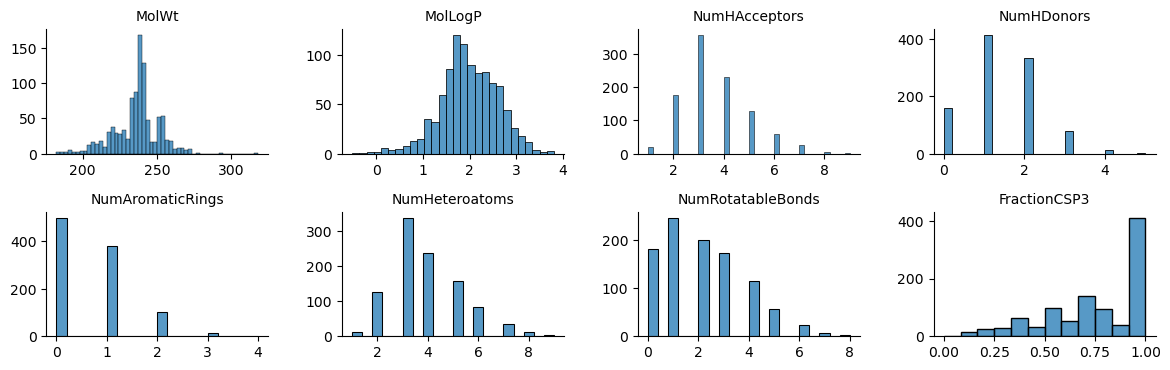

In [5]:
import seaborn as sns
melted = tmp.melt(var_name='col', value_name='value')

g = sns.FacetGrid(melted, col='col', col_wrap=4, height=2, aspect=1.5, sharey=False, sharex=False)
g.map(sns.histplot, 'value')
g.set_axis_labels('', '')
g.set_titles(template='{col_name}');